In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get the numerical variables from our dataset.

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [6]:
numericals = data._get_numeric_data()

In [7]:
numericals

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


# 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution

In [32]:
def col_dist_plots(df):
    for col in df.columns:
        sns.displot(df[col])
        plt.show()

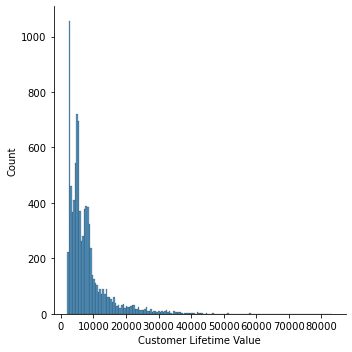

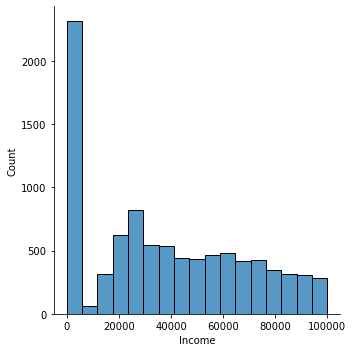

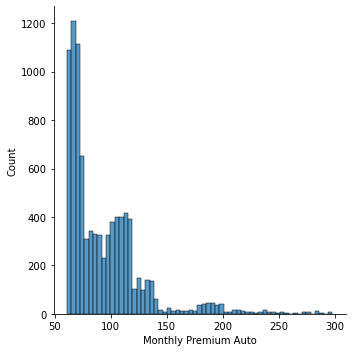

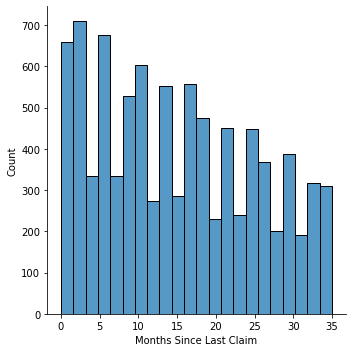

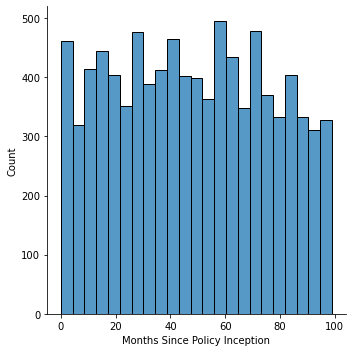

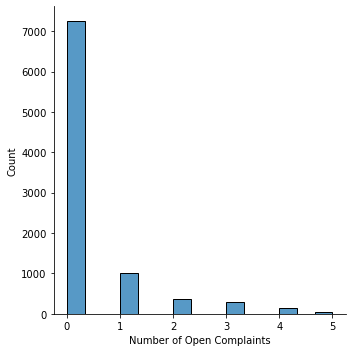

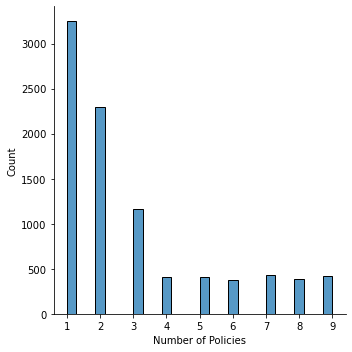

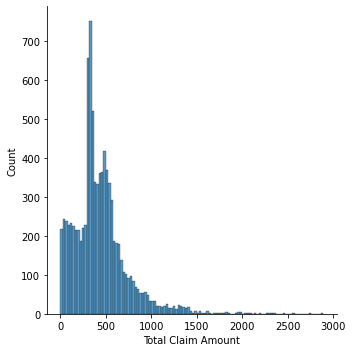

In [33]:
col_dist_plots(numericals)
    

By observing the plots, we see that most of our variables fit the exponential distribution (high number of observations close to zero and a few observations that deviate far to the right from 0)

The noticeable exceptions are the variables:
- Months since policy inception, which is closer to a (very flat) normal distribution
- Total claim amount : if we remove the outliers, the distribution is close to normal

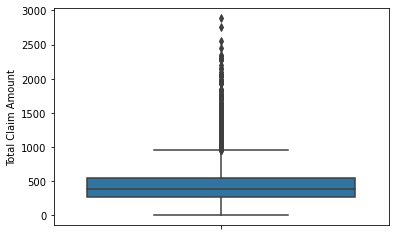

In [12]:
sns.boxplot(y=data['Total Claim Amount'])
plt.show()

We can also look at the distribution with a box plot : if you remove the outliers, you see that the whiskers are more or less symetric on each side of the median and that we do not have many observations around 0.

# 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result

### 3.1. Log transformation

In [28]:
def log_transform_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

def log_trans(df):
    for colname in df.columns:
        df[colname] = df[colname].apply(log_transform_clean)
    return df

In [36]:
numericals_log = numericals.copy()
numericals_logs = log_trans(numericals_log)
numericals_logs

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,NaN,0.000000,5.952753
1,8.850738,NaN,4.543295,2.564949,3.737670,NaN,2.079442,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,NaN,0.693147,6.339428
3,8.941920,NaN,4.663439,2.890372,4.174387,NaN,1.945910,6.272653
4,7.942253,10.688211,4.290459,2.484907,3.784190,NaN,0.000000,4.928202
...,...,...,...,...,...,...,...,...
9129,10.060747,11.183602,4.290459,2.890372,4.488636,NaN,0.693147,5.289452
9130,8.038031,9.980634,4.369448,2.639057,3.332205,NaN,0.000000,5.938064
9131,9.007476,NaN,4.442651,2.197225,3.610918,1.098612,0.693147,6.673026
9132,8.925912,9.996112,4.564348,3.526361,1.098612,NaN,1.098612,6.538429


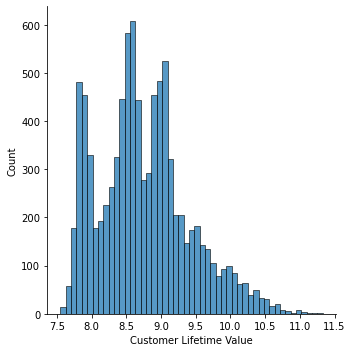

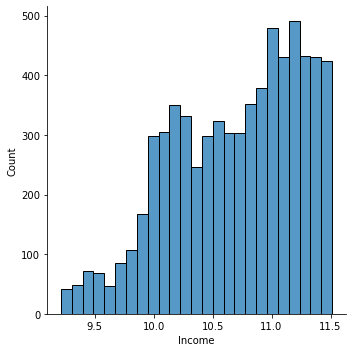

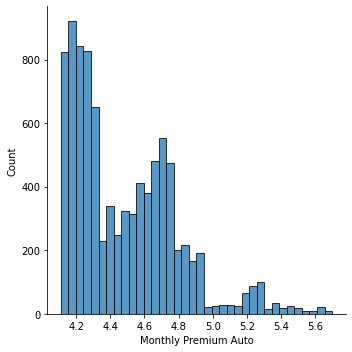

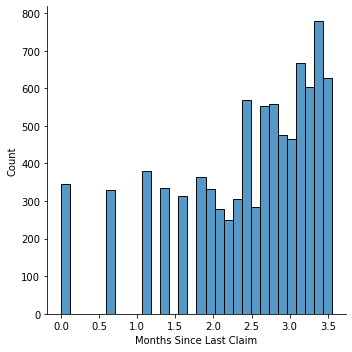

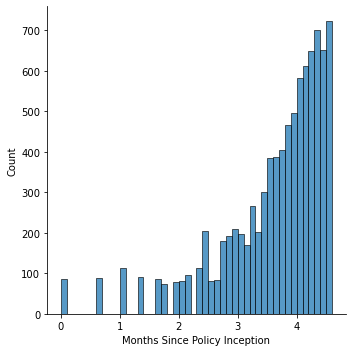

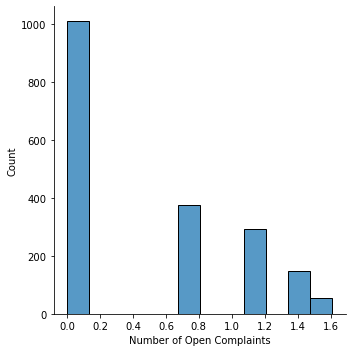

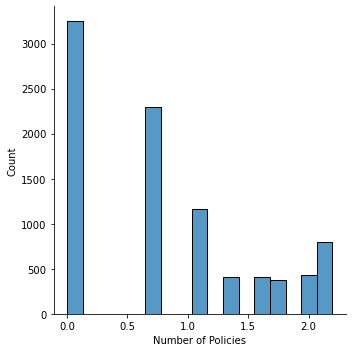

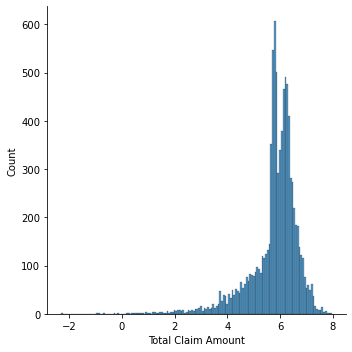

In [38]:
col_dist_plots(numericals_logs)

We see that the log transformation does alter the distribution for series that have a lot of values at 0.

Those values being put to NaN during the transformation, we see for example that the distribution for the customer lifetime value now appears to be normal. This is not a transformation of the distribution as such, but more a loss of data.

I'll skip the log transformation for now.

### 3.2. Min Max scaler

In [39]:
from sklearn.preprocessing import MinMaxScaler
numericals_normalized = pd.DataFrame(MinMaxScaler().fit_transform(numericals), columns=numericals.columns)

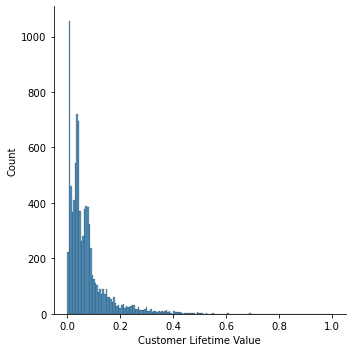

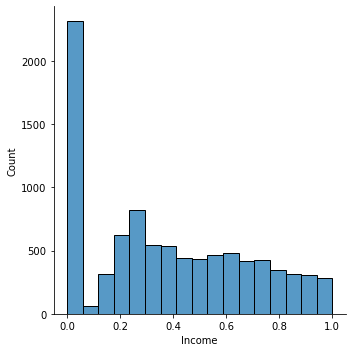

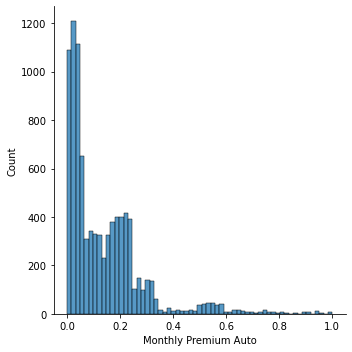

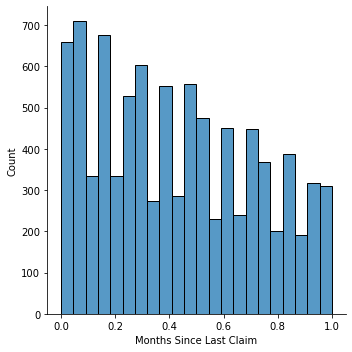

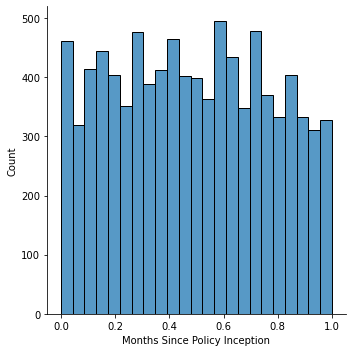

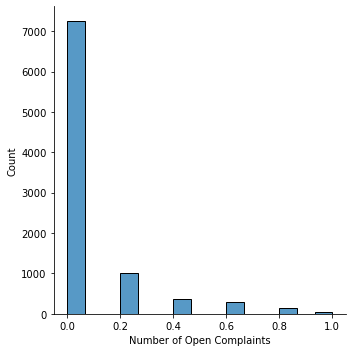

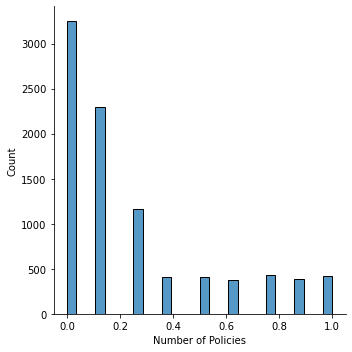

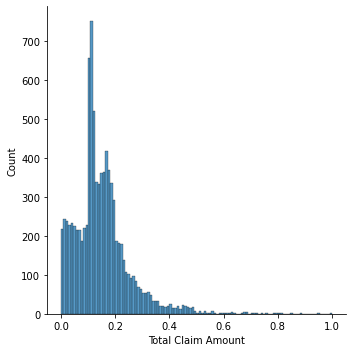

In [40]:
col_dist_plots(numericals_normalized)

With the Min Max scaler, the distributions remain exactly the same, for all the variables.

### 3.3. Standard scaler

In [42]:
from sklearn.preprocessing import StandardScaler
numericals_standardized = StandardScaler().fit(numericals).transform(numericals)
numericals_standardized = pd.DataFrame(numericals_standardized, columns=numericals.columns)

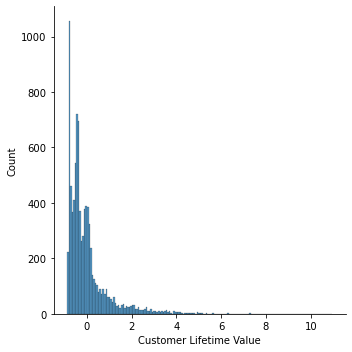

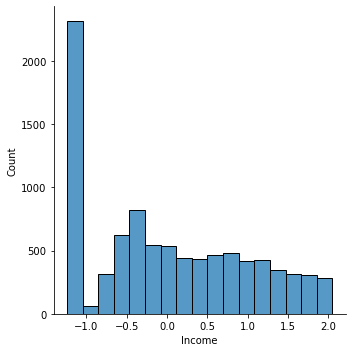

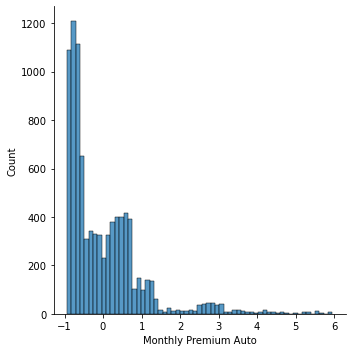

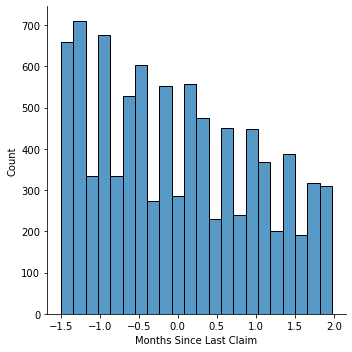

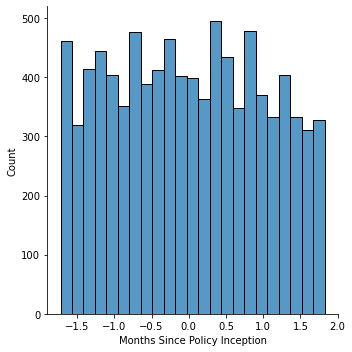

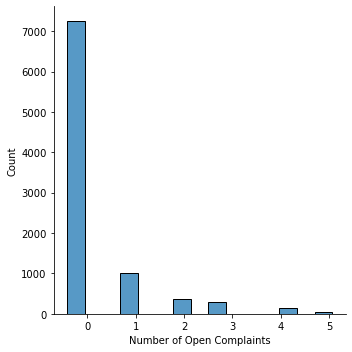

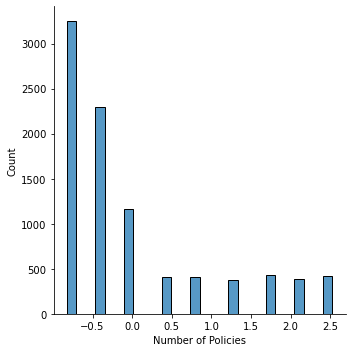

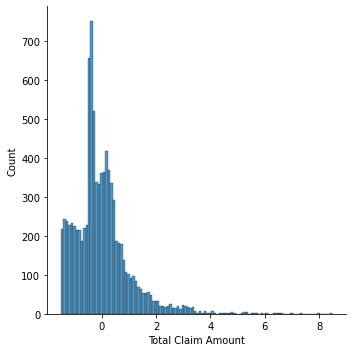

In [43]:
col_dist_plots(numericals_standardized)

Again, the transformation leaves the distribution completely unchanged.